In [1]:
import sys
sys.path.append("/home/hugo/projetos-doutorado/mimo_emb_fts/src/")
#sys.path.insert(0, '/home/hugo/projetos-doutorado/imp_doutorado/src/evolving_soda') 
import pandas as pd
import matplotlib.pyplot as plt
from embfts.models.NonStationaryFtsPca import NonStationaryFtsPca
from pyFTS.benchmarks import Measures
from pyFTS.models.nonstationary import nsfts
import math
import datetime
import statistics
import numpy as np
from pyFTS.common import Util
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

from embfts.util.DataSetUtil import DataSetUtil
from embfts.util.StatisticsUtil import StatisticsUtil


np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### Dataset Air Quality

In [2]:
data_set_util = DataSetUtil()
statistics = StatisticsUtil()

In [3]:
df = pd.read_csv('/home/hugo/projetos-doutorado/mimo_emb_fts/data/AirQualityUCI.csv', sep=';', decimal=',')
data = df.drop(labels=['Date','Time','Unnamed: 15', 'Unnamed: 16'], axis=1)
data = data_set_util.clean_dataset(data)
data = data_set_util.series_to_supervised_miso(data, 1, 1, 'NO2(GT)')
data.head()

,CO(GT)(t-1),PT08.S1(CO)(t-1),NMHC(GT)(t-1),C6H6(GT)(t-1),PT08.S2(NMHC)(t-1),NOx(GT)(t-1),PT08.S3(NOx)(t-1),NO2(GT)(t-1),PT08.S4(NO2)(t-1),PT08.S5(O3)(t-1),T(t-1),RH(t-1),AH(t-1),NO2(GT)(t)
1,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,92.0
2,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,114.0
3,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,122.0
4,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,116.0
5,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,96.0


### Model: NonStationaryFtsPca - PCA-NSFTS

In [4]:
fts_pca = NonStationaryFtsPca(num_components_pca = 1,
                          fts_model = nsfts.NonStationaryFTS,
                          order_fts_model = 1,
                          npart = 50,
                          gamma = 0.01,
                          memory_window_error = 25)



### Sliding Window PyFTS: PCA-NSFTS

--------------------
training window 0


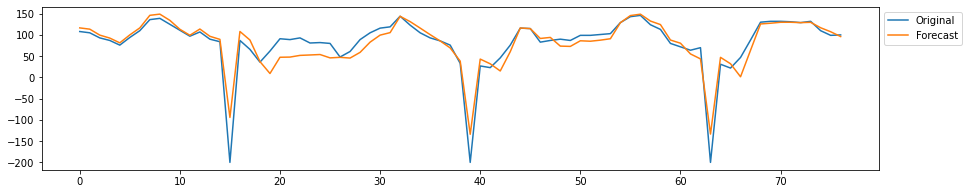

--------------------
training window 311


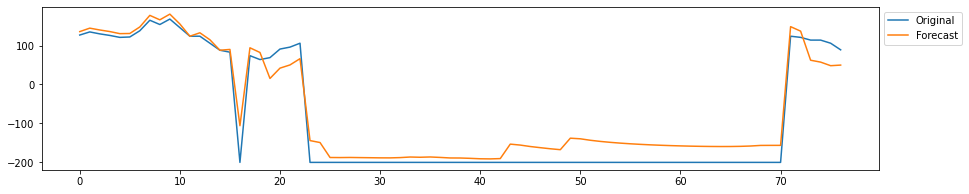

--------------------
training window 622


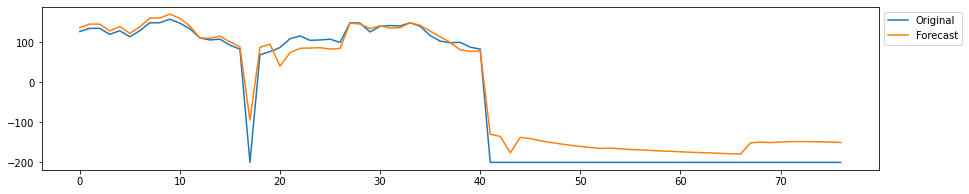

--------------------
training window 933


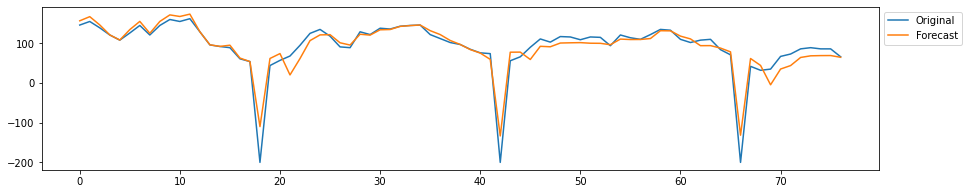

--------------------
training window 1244


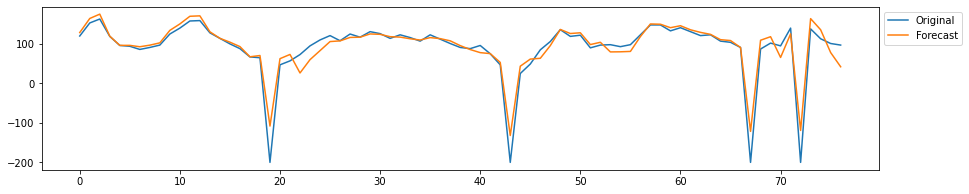

--------------------
training window 1555


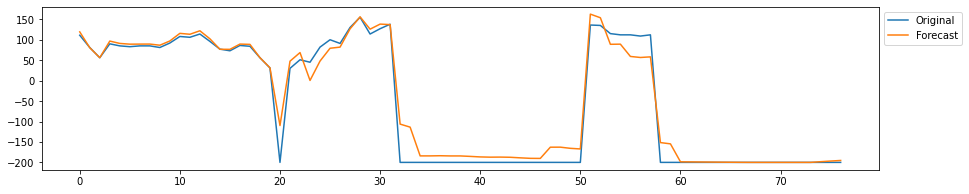

--------------------
training window 1866


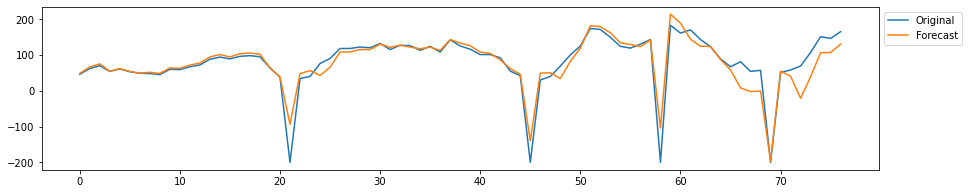

--------------------
training window 2177


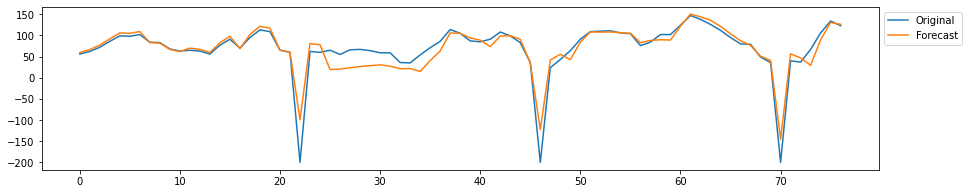

--------------------
training window 2488


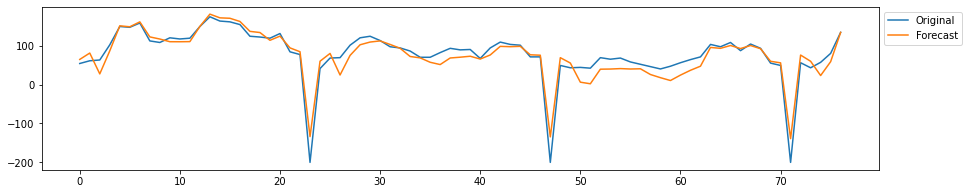

--------------------
training window 2799


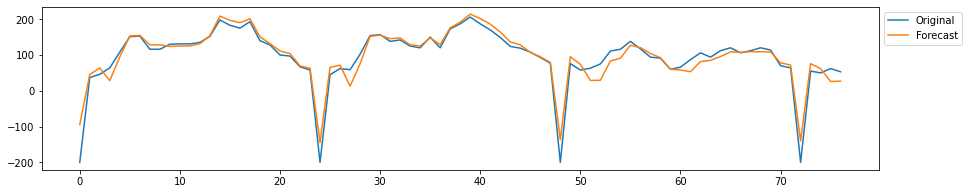

--------------------
training window 3110


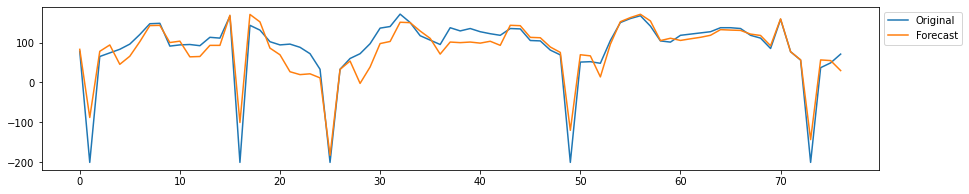

--------------------
training window 3421


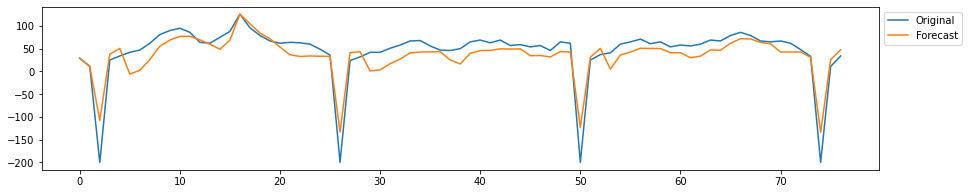

--------------------
training window 3732


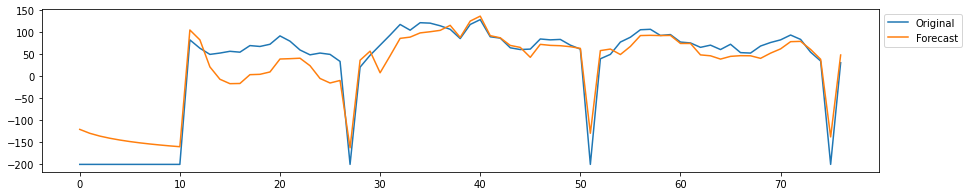

--------------------
training window 4043


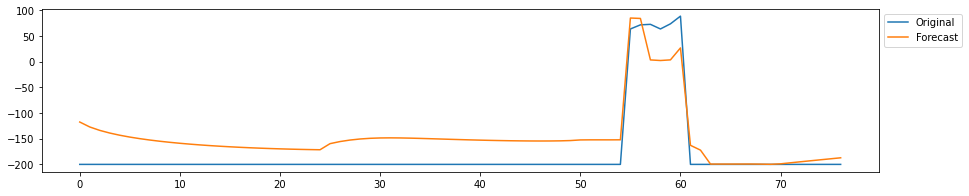

--------------------
training window 4354


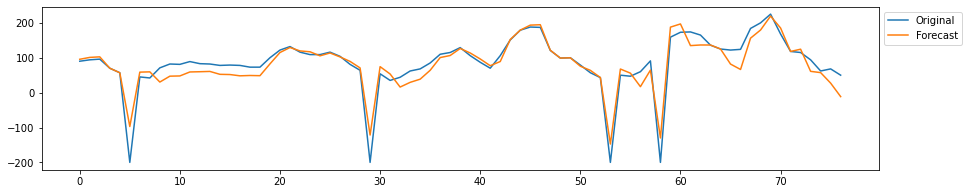

--------------------
training window 4665


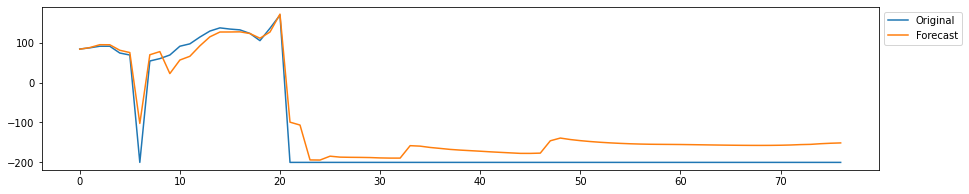

--------------------
training window 4976


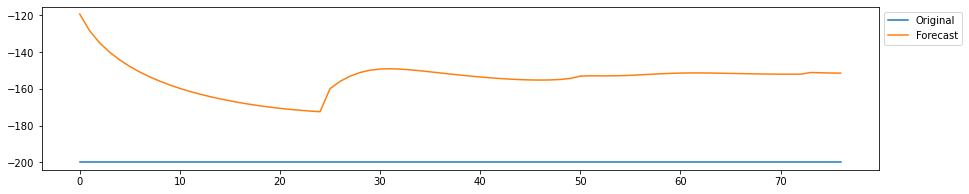

--------------------
training window 5287


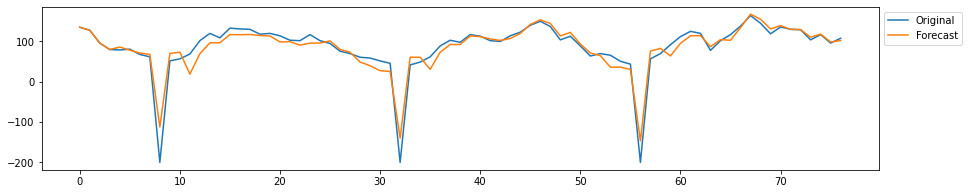

--------------------
training window 5598


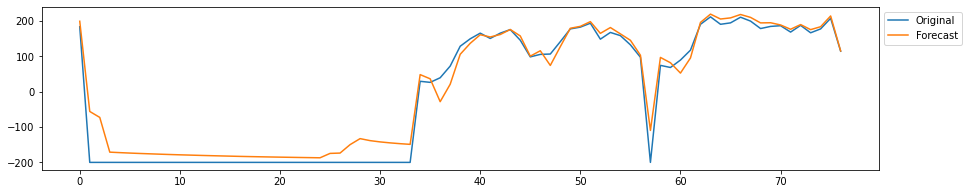

--------------------
training window 5909


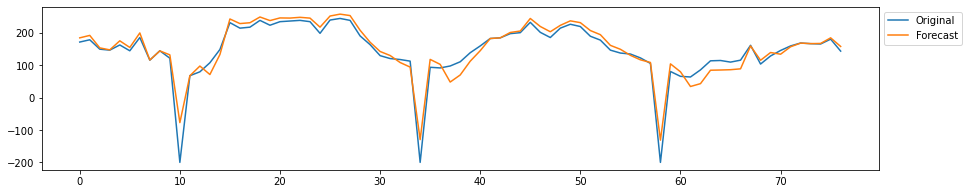

--------------------
training window 6220


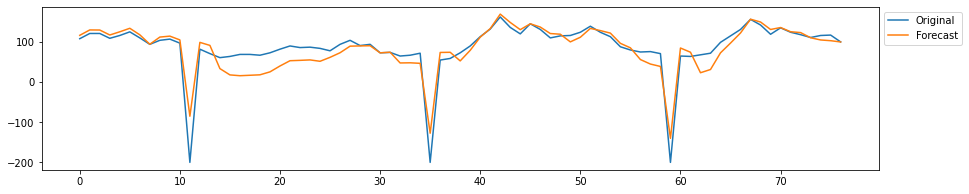

--------------------
training window 6531


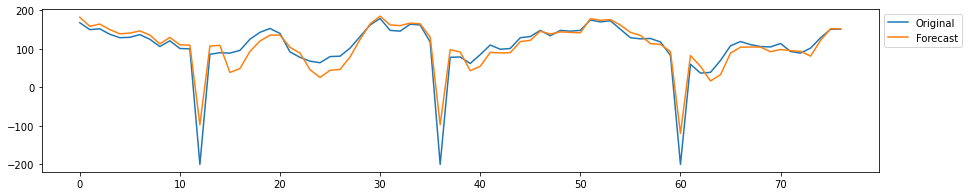

--------------------
training window 6842


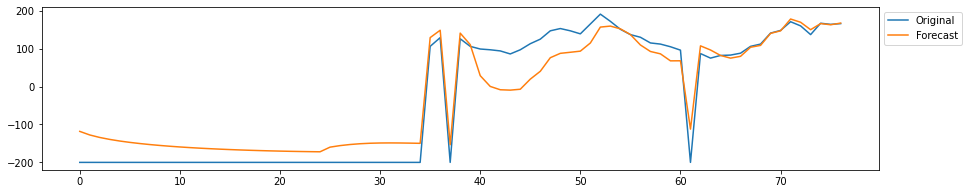

--------------------
training window 7153


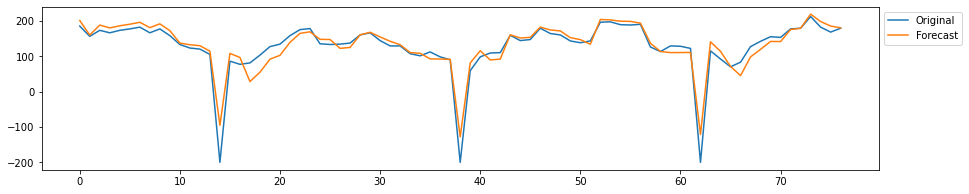

--------------------
training window 7464


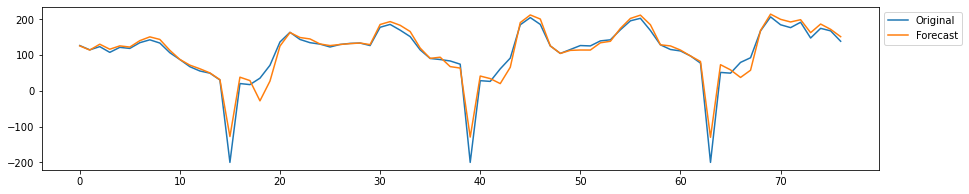

--------------------
training window 7775


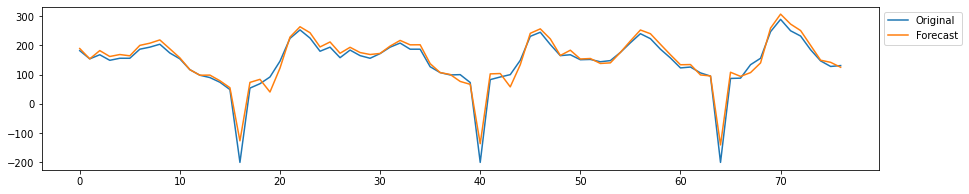

--------------------
training window 8086


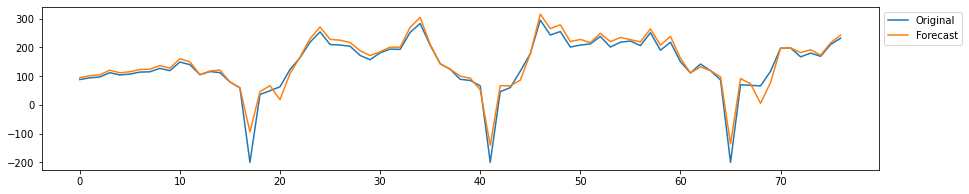

--------------------
training window 8397


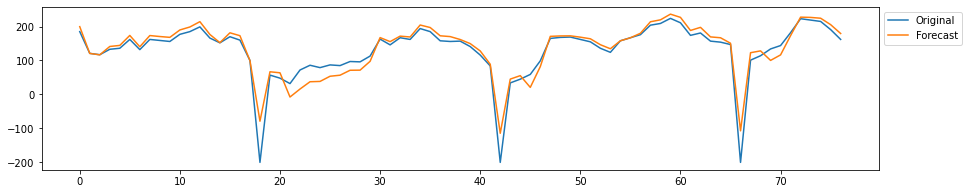

--------------------
training window 8708


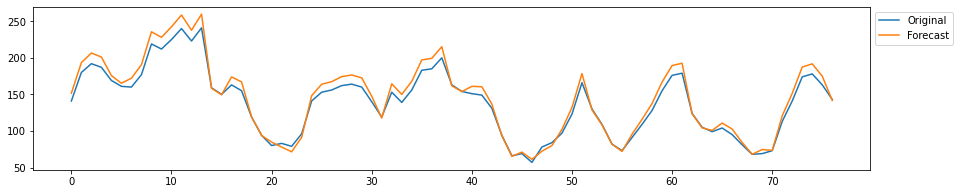

--------------------
training window 9019


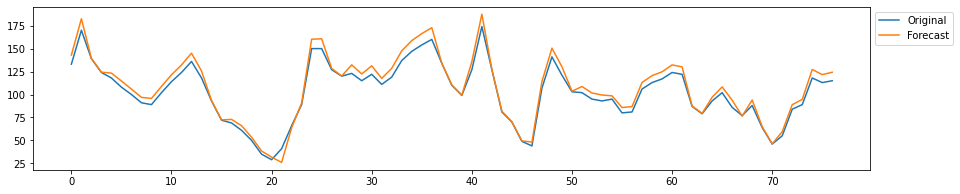

In [5]:
final_result,results = statistics.sliding_windows_miso_ensfts(data = data, n_windows = 30, train_size = 0.75, model = fts_pca, 
                                                              transformation = 'PCA', first_col_train = 'CO(GT)(t-1)', 
                                                              last_col_train = 'AH(t-1)', target_col_train = 'NO2(GT)(t-1)',
                                                              target_col_test = 'NO2(GT)(t)', plot_graph = True, steps_ahead = 1)

#### Sliding Windows Statistics: 

In [6]:
print("Sliding Windows Statistics (test): ")
results

Sliding Windows Statistics (test): 


,rmse,mape,smape,mae,r2,nrmse
0,23.364479,18.272838,10.891769,15.152691,0.866648,0.067527
1,35.628070,18.707609,10.975321,29.649089,0.945384,0.096815
2,33.718741,15.884698,8.881235,26.539440,0.955523,0.094186
3,20.666881,14.368580,8.326660,13.251755,0.903007,0.057091
4,23.145766,12.801875,6.927817,13.812162,0.900034,0.063762
5,26.006992,12.368388,7.429951,15.731016,0.969288,0.073259
6,28.464234,17.955543,11.720930,16.604973,0.860302,0.074319
7,22.198871,17.992319,10.756248,13.555622,0.865601,0.063974
8,21.595183,21.657339,13.472587,16.101218,0.891228,0.057741
9,22.881425,15.432670,8.884123,15.007384,0.918847,0.056358


#### Mean Statistics PCA-NSFTS:

In [7]:
print("Mean Statistics PCA-NSFTS (test): ")
final_result

Mean Statistics PCA-NSFTS (test): 


,rmse,mape,smape,mae,r2,nrmse
0,27.140049,17.338071,10.40116,19.846335,0.866147,0.070306


### Sliding Window PyFTS: KPCA-NSFTS

--------------------
training window 0


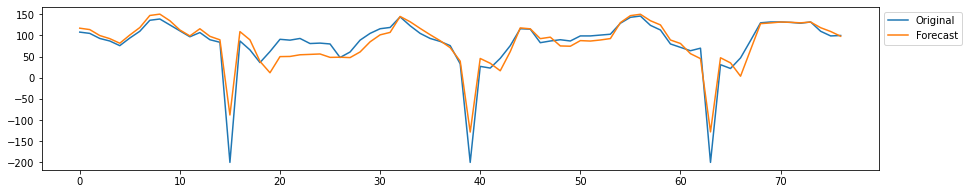

--------------------
training window 311


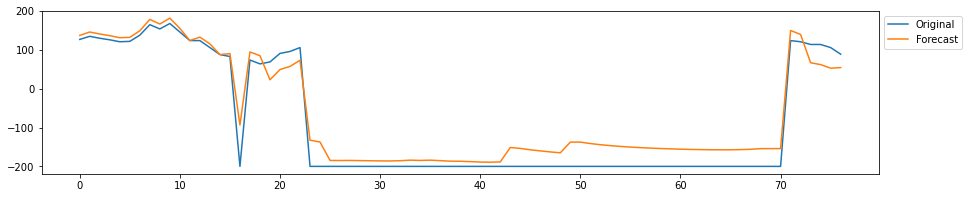

--------------------
training window 622


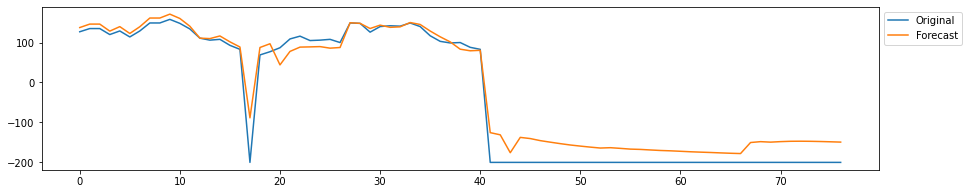

--------------------
training window 933


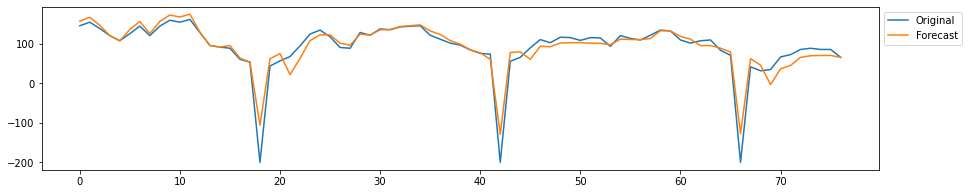

--------------------
training window 1244


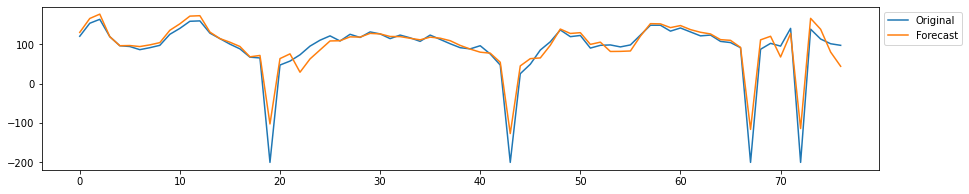

--------------------
training window 1555


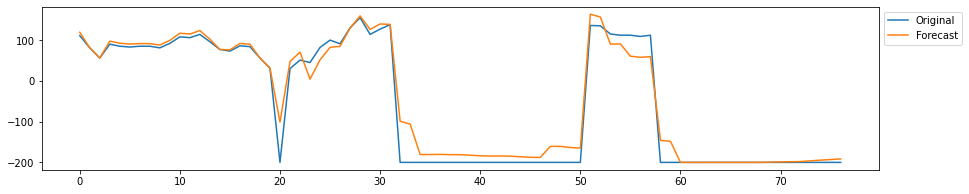

--------------------
training window 1866


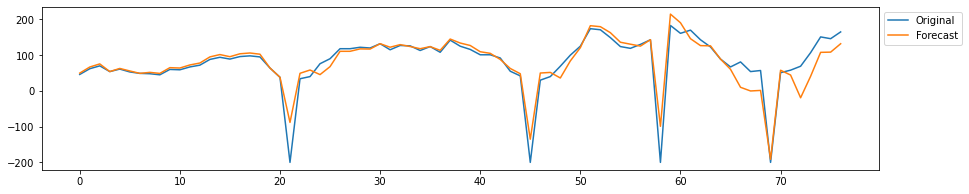

--------------------
training window 2177


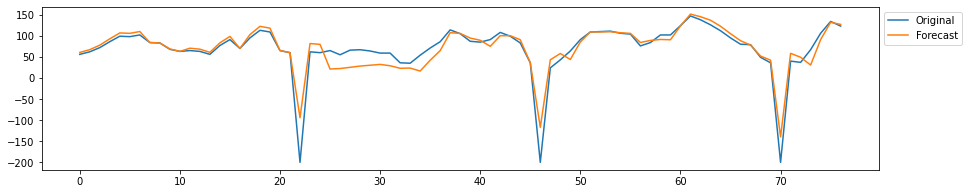

--------------------
training window 2488


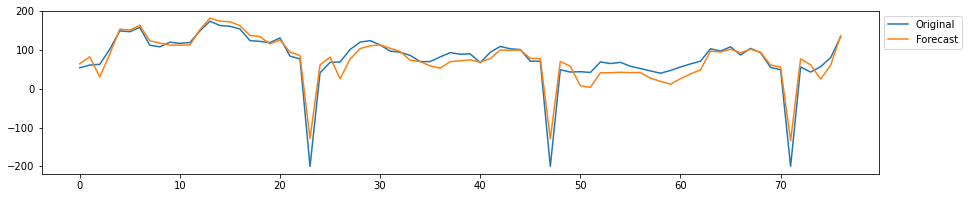

--------------------
training window 2799


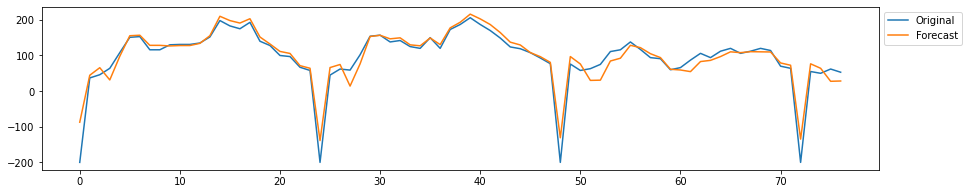

--------------------
training window 3110


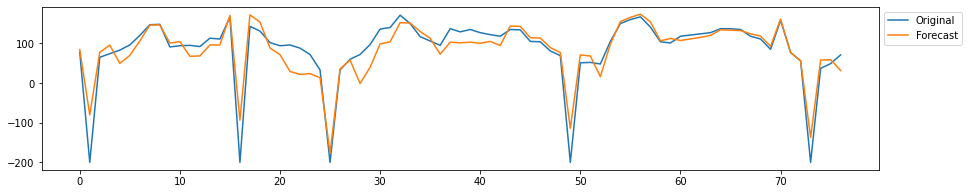

--------------------
training window 3421


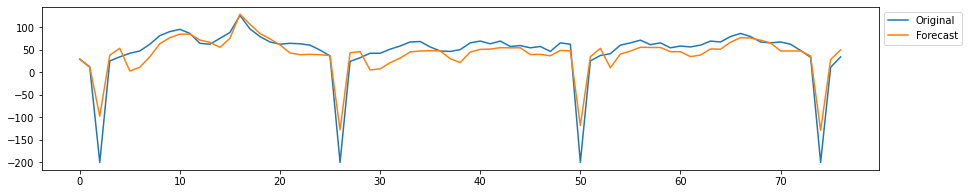

--------------------
training window 3732


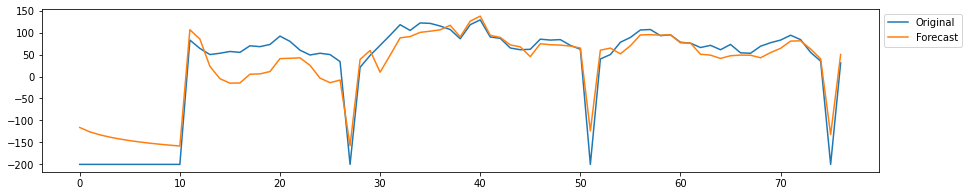

--------------------
training window 4043


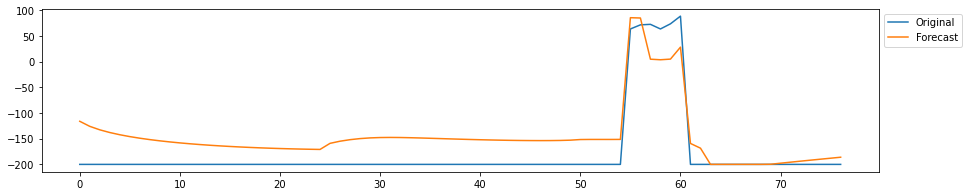

--------------------
training window 4354


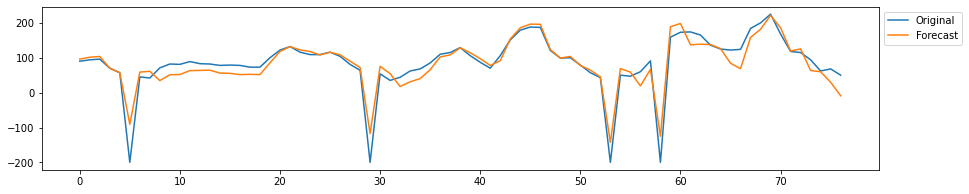

--------------------
training window 4665


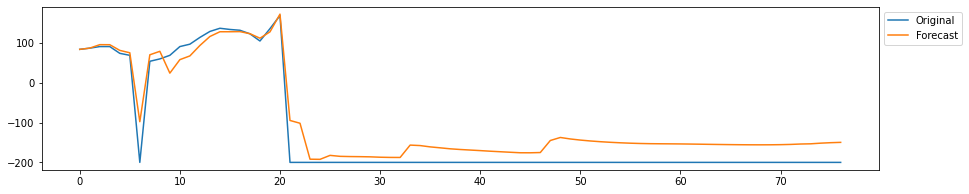

--------------------
training window 4976


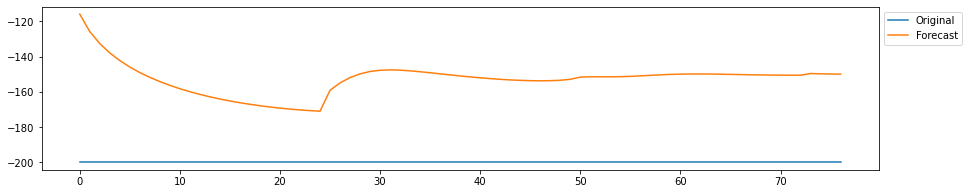

--------------------
training window 5287


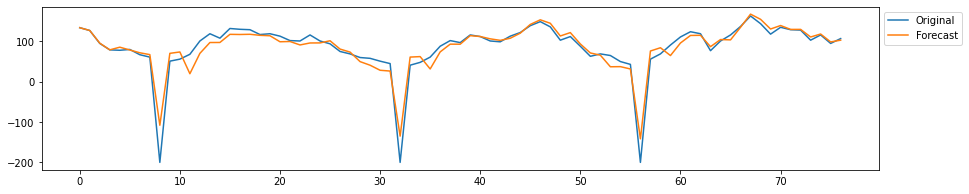

--------------------
training window 5598


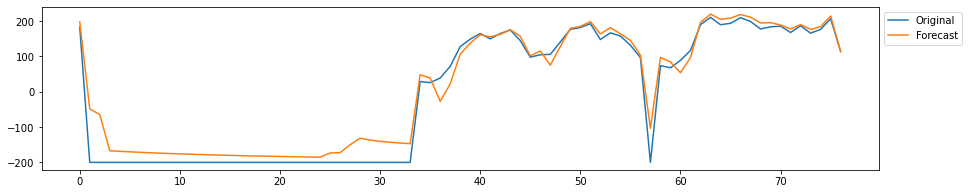

--------------------
training window 5909


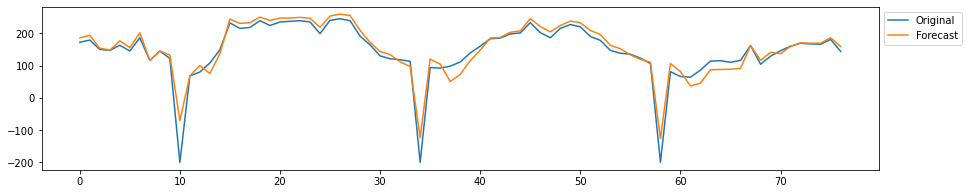

--------------------
training window 6220


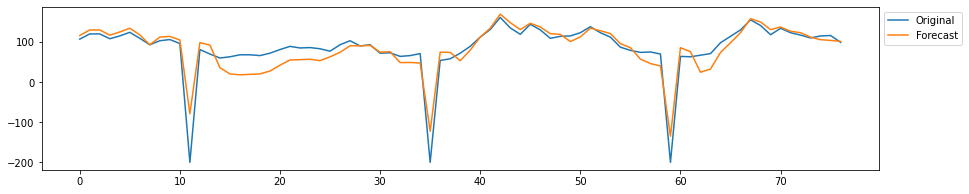

--------------------
training window 6531


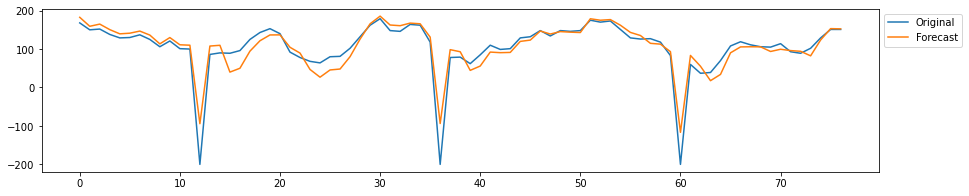

--------------------
training window 6842


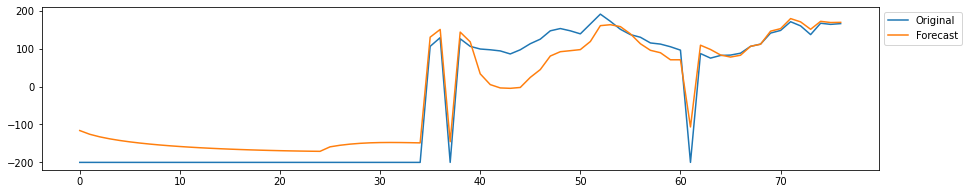

--------------------
training window 7153


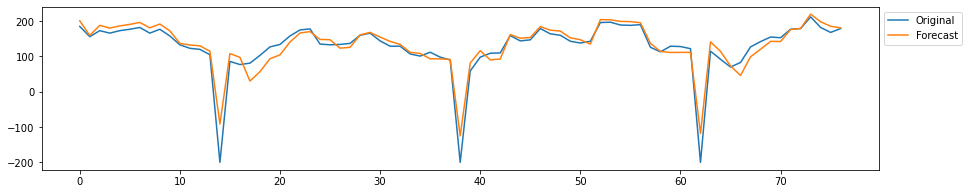

--------------------
training window 7464


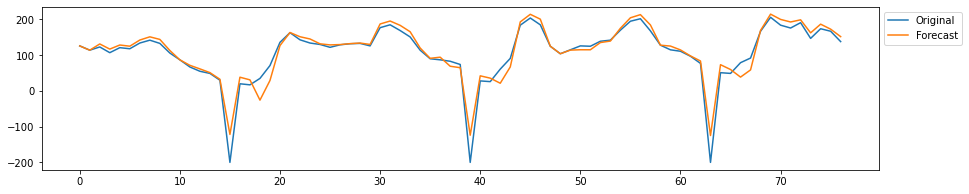

--------------------
training window 7775


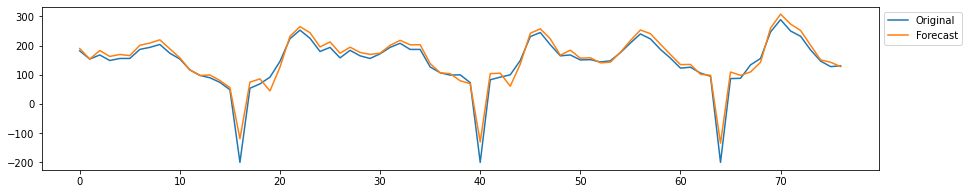

--------------------
training window 8086


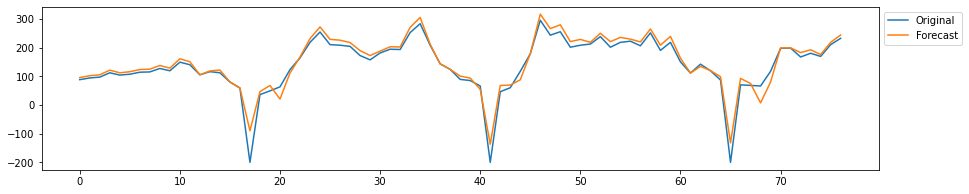

--------------------
training window 8397


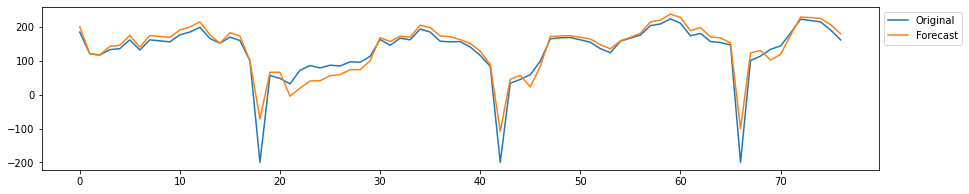

--------------------
training window 8708


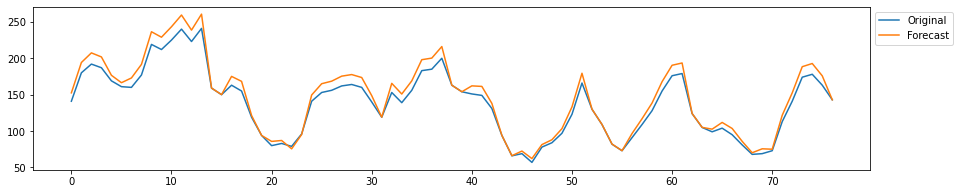

--------------------
training window 9019


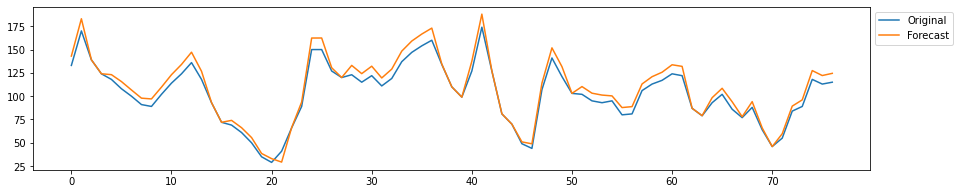

In [8]:
final_result_kpca,results_kpca = statistics.sliding_windows_miso_ensfts(data = data, n_windows = 30, train_size = 0.75, model = fts_pca, 
                                                              transformation = 'KPCA', first_col_train = 'CO(GT)(t-1)', 
                                                              last_col_train = 'AH(t-1)', target_col_train = 'NO2(GT)(t-1)',
                                                              target_col_test = 'NO2(GT)(t)', plot_graph = True, steps_ahead = 1)

#### Sliding Windows Statistics: 

In [9]:
print("Sliding Windows Statistics: ")
results_kpca

Sliding Windows Statistics: 


,rmse,mape,smape,mae,r2,nrmse
0,23.679051,18.450834,10.633187,15.196086,0.863033,0.068437
1,36.975386,19.135238,11.017960,30.996584,0.941175,0.100477
2,34.423523,15.937879,8.896479,26.898250,0.953644,0.096155
3,21.031837,14.372283,8.257414,13.305227,0.899551,0.058099
4,23.975478,13.167876,7.030209,14.226562,0.892738,0.066048
5,27.670232,13.015467,7.635927,17.065508,0.965235,0.077944
6,28.675425,18.123187,11.672065,16.720066,0.858221,0.074871
7,22.672806,18.034222,10.516844,13.669878,0.859801,0.065339
8,21.726059,21.245868,12.879924,15.964719,0.889906,0.058091
9,23.777056,15.753926,8.910722,15.465862,0.912370,0.058564


#### Mean Statistics KPCA-NSFTS:

In [10]:
print("Mean Statistics KPCA-NSFTS: ")
final_result_kpca

Mean Statistics KPCA-NSFTS: 


,rmse,mape,smape,mae,r2,nrmse
0,27.701239,17.355313,10.23285,20.181542,0.863145,0.071779
